# **Project Name**    - GLASSDOOR SALARY PREDICTION

##### **Project Type**    - REGRESSION
##### **Contribution**    - INDIVIDUAL


# **Project Summary -**

This project focuses on analyzing and predicting salary trends in the tech industry using job posting data collected from Glassdoor during 2017-18. The primary objective is to understand how salaries varies across different job roles, company sizes, and locations to develop  a predictive model which is capable to estimate average salary values for new job postings based on these factors. The dataset includes essential attributes such as job title and description, company rating and its size, salary estimate,job location,industry & sector and revenue.

Using supervised machine learning techniques, specifically regression models, project involves several stages- including EDA, data visualization, preprocessing, model building and performance evaluation.Three regression models - Linear Regression, Decision Trees and Random Forest were developed and evaluated using metrics such as R² Score, MAE,RMSE.This project offers valuable insights for job seekers, employers, and recruiters, helping them make data-driven decisions regarding compensation trends and salary expectations in the tech industry.

# **Problem Statement**


- To analyze how salaries vary by job position, company size and location.

- To understand the factors that affect compensation trends in the tech industry.

- To build  a superived  machine learning regression model to predict average salary based on job attributes.

- Provide  insights to support data driven decision making for job seekers, employers and recruiters.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




# ***Let's Begin !***

## ***1. Know Your Data***




#### Importing Libraries

In [ ]:
#Importing  required libraries

#For data manipulation
import numpy as np
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

# For ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [ ]:
data = pd.read_csv('/content/glassdoor_jobs.csv')

#### Dataset View

In [ ]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


#### Dataset rows and columns count

In [ ]:
#Number of rows and columns in dataset
data.shape

(956, 15)

#### Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Check for duplicated values

In [ ]:
# Checking for duplicate rows in  data
print("Duplicate records in data \n",data.duplicated().sum())


Duplicate records in data 
 0


#### Checking for missing values

In [ ]:
print("Number of missing rows in data are:\n", data.isnull().sum())

Number of missing rows in data are:
 Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


####  Dataset Overview:-

Upon inspecting the data it is found that:-
- The dataset consists of 956 rows and 15 columns.

- The key features are Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue, and Competitors.

- There are no duplicated values in the dataset.

- No missing values are present in any of the column.

- The target variable for this problem is likely to be derived from Salary Estimate.

So ,the dataset is clean and ready for exploratory data analysis and model development.

## ***2. Understanding Your Variables***

#### Columns of dataset

In [ ]:
print("Columns of dataset are:\n",data.columns.tolist())

Columns of dataset are:
 ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


#### Dataset description

| Column Name           | Description                                                      |
| :-------------------- | :--------------------------------------------------------------- |
| **Unnamed:**          | Index or serial number (non-essential column)                    |
| **Job Title**         | Title or designation of the job posting                          |
| **Salary Estimate**   | Estimated salary range for the job                               |
| **Job Description**   | Textual description of job responsibilities and requirements     |
| **Rating**            | Average company rating on Glassdoor                              |
| **Company Name**      | Name of the hiring company                                       |
| **Location**          | City and state where the job is based                            |
| **Headquarters**      | Location of the company’s headquarters                           |
| **Size**              | Size category of the company (e.g., 51-200, 1001-5000 employees) |
| **Founded**           | Year in which the company was established                        |
| **Type of ownership** | Type of organization (e.g., Private, Public, Non-profit)         |
| **Industry**          | Industry category of the company                                 |
| **Sector**            | Sector to which the company belongs                              |
| **Revenue**           | Company’s revenue range                                          |
| **Competitors**       | Competitors listed for the company                               |


#### Summary statistics

In [ ]:
data.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


#### Check for unique column

In [ ]:
data.nunique()

,0
Unnamed: 0,956
Job Title,328
Salary Estimate,417
Job Description,596
Rating,32
Company Name,448
Location,237
Headquarters,235
Size,9
Founded,109


## 3. ***Data Wrangling***


During initial data inspection:
- No null (`NaN`) values were found.
- No duplicate rows existed.

However, further inspection revealed that the dataset uses **`-1` as a placeholder for missing or unavailable data** in several columns.

### Check for placeholder -1 values

In [ ]:
# Check  for string '-1' values in object columns
print("String '-1' counts:")
print((data == '-1').sum())

# Check for numeric -1 values in numeric columns
print("\nNumeric -1 counts:")
print((data == -1).sum())

String '-1' counts:
Unnamed: 0             0
Job Title              0
Salary Estimate      214
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters          11
Size                  11
Founded                0
Type of ownership     11
Industry              39
Sector                39
Revenue               11
Competitors          634
dtype: int64

Numeric -1 counts:
Unnamed: 0            0
Job Title             0
Salary Estimate       0
Job Description       0
Rating               34
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              97
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
dtype: int64


##### Columns containing `-1` placeholders:
- **Numerical columns:** `Rating`, `Founded`
- **Categorical columns:** `Salary Estimate`, `Headquarters`, `Size`, `Industry`, `Type of ownership`, `Sector`, `Revenue`, `Competitors`

### Handling placeholder values

In [ ]:
# Replace -1 with np.nan for numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    data[col] = data[col].replace(-1, np.nan)

# Now fill NaNs with median
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)


In [ ]:
# Replace String `'-1'` with 'Unknown' in Categorical Columns
# List of categorical columns containing string '-1'
categorical_cols = ['Salary Estimate', 'Headquarters', 'Size', 'Industry',
                    'Type of ownership', 'Sector', 'Revenue']

# Replace string '-1' with 'Unknown'
for col in categorical_cols:
    data[col] = data[col].replace('-1', 'Unknown')


In [ ]:
# Drop 'Competitors' column due to high missing values and limited utility
data.drop(columns=['Competitors'], inplace=True)


####Clean and Convert 'Salary Estimate' to Numeric Average Salary

The `Salary Estimate` column contains salary ranges as strings.  
We:
- Replace `-1` with median for numerical column
- Replace `-1` with 'Unknown' for categorical column
- Droped column competitors
- Remove text symbols like `K`, `$`, and `(Glassdoor est.)`
- Split min and max salary values
- Compute the average

In [ ]:
import re

def parse_salary(s):
    if pd.isnull(s):
        return np.nan
    hourly = False
    if 'per hour' in s.lower() or 'per-hour' in s.lower():
        hourly = True
    s_clean = s.replace('K','').replace('$','').split('(')[0]
    s_clean = re.sub(r'[^\d\-]', '', s_clean)
    if '-' in s_clean:
        min_sal, max_sal = s_clean.split('-')
        avg_salary = (int(min_sal) + int(max_sal)) / 2
        if hourly:
            avg_salary *= 2080  # Convert hourly to annual salary
        else:
            avg_salary *= 1000  # K to dollars
        return avg_salary
    else:
        return np.nan

In [ ]:
data['Average Salary'] = data['Salary Estimate'].apply(parse_salary)


In [ ]:
#Checking results to verify
data[['Salary Estimate', 'Average Salary']].head(20)


,Salary Estimate,Average Salary
0,$53K-$91K (Glassdoor est.),72000.0
1,$63K-$112K (Glassdoor est.),87500.0
2,$80K-$90K (Glassdoor est.),85000.0
3,$56K-$97K (Glassdoor est.),76500.0
4,$86K-$143K (Glassdoor est.),114500.0
5,$71K-$119K (Glassdoor est.),95000.0
6,$54K-$93K (Glassdoor est.),73500.0
7,$86K-$142K (Glassdoor est.),114000.0
8,$38K-$84K (Glassdoor est.),61000.0
9,$120K-$160K (Glassdoor est.),140000.0


In [ ]:
# Checking for null values in the 'Average Salary' column
data['Average Salary'].isnull().sum()

np.int64(214)

In [ ]:
#Fill missing Average Salary values with median per Job Title
data['Average Salary'] = data.groupby('Job Title')['Average Salary'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
#If any nulls remain (for job titles that had no salary at all), fill with overall median
overall_median = data['Average Salary'].median()
data['Average Salary'].fillna(overall_median, inplace=True)

In [ ]:
#checking again if thre exists any null value
print("Missing values in Average Salary:", data['Average Salary'].isnull().sum())

Missing values in Average Salary: 0


#### **Manipulation done:**
- Identified ‘-1’ values in several columns as missing indicators.

- For numeric columns like Rating and Founded, replaced ‘-1’ with NaN for accurate analysis.

- For categorical columns like Size, Type of ownership, Industry, Sector, Revenue, and Headquarters, replaced ‘-1’ with ‘Unknown’ for clarity.

- Cleaned Salary Estimate by replacing ‘-1’ with NaN.

- Created ‘Average Salary’ by extracting salary ranges, converting Per Hour salaries to annual, and calculating averages.

- Imputed missing Average Salary values:
   
   - With median salary by Job Title
   
   - Remaining missing values with overall median

#### **Insights:**
- 24 hourly job postings converted to annual salaries.

- Around 22% salary data missing, handled via imputation.

- Now the dataset has a complete Average Salary column and cleaned numeric and categorical features, ready for EDA and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Distribution of Average Salary

**What does it shows:-** This chart shows the distribution of all average salaries in the dataset. It helps to identify whether the data is normally distributed,skewed or has outliers.

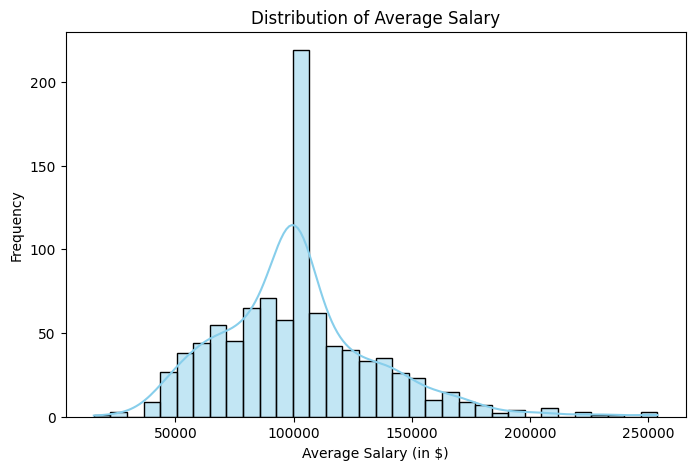

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['Average Salary'], kde=True, color='skyblue')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary (in $)')
plt.ylabel('Frequency')
plt.show()


#### **Insights:**
- Most salaries fall between $60K and $110K.

- The distribution is right-skewed, with a few high-salary outliers.

- There's a spike near $100K, indicating a common salary point.

- A long tail extends beyond $150K, showing some high-paying roles.

### Average Salary by Job Title (Top 10)

**What does it shows:** This bar plot compares the average salary for top 10 job title in the dataset.



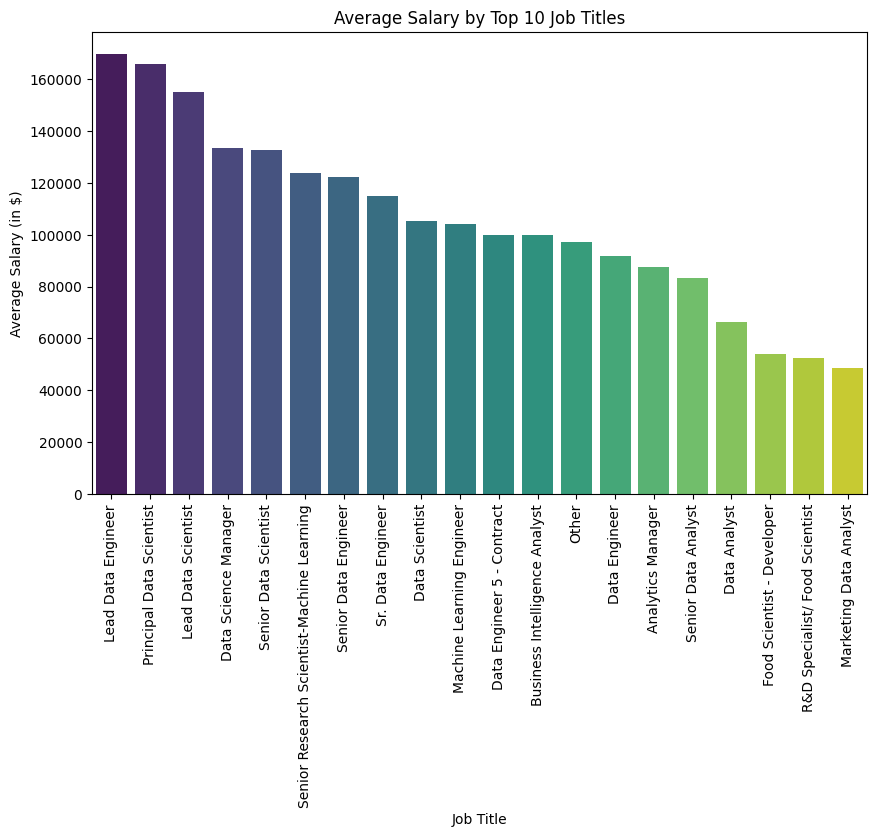

In [ ]:
top_jobs = data['Job Title'].value_counts().head(20).index
avg_salary_by_job = data[data['Job Title'].isin(top_jobs)].groupby('Job Title')['Average Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_job.index, y=avg_salary_by_job.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Average Salary (in $)')
plt.title('Average Salary by Top 10 Job Titles')
plt.show()


**Insights:**
- Lead Data Scientist has the highest average salary (~$160K).

- Analyst roles (e.g., Data Analyst, Marketing Data Analyst) have the lowest average salaries, under $70K.

- Engineering and senior roles generally command higher pay than analyst roles.

- There is a clear downward trend in salary from leadership to entry-level roles.

### Average Salary By Companies Size

**What does it shows:** It shows how company size impacts average salary offerings.

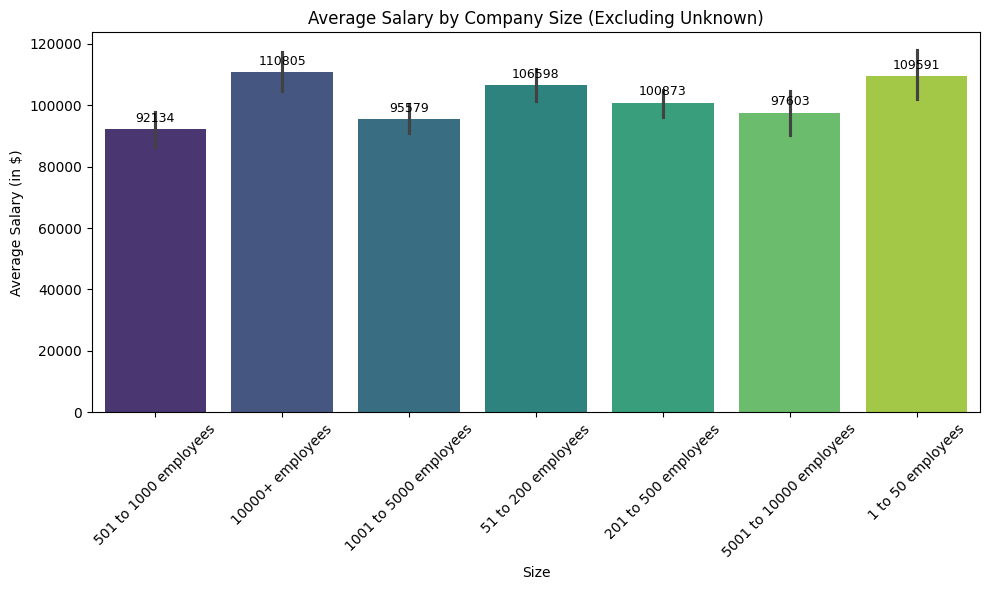

In [ ]:
# Exclude rows where Size is 'Unknown'
filtered_data = data[data['Size'] != 'Unknown']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='Size',
    y='Average Salary',
    data=filtered_data,
    estimator=np.mean,
    palette='viridis'
)

plt.xticks(rotation=45)
plt.title('Average Salary by Company Size (Excluding Unknown)')
plt.ylabel('Average Salary (in $)')

# Add salary labels above each bar
size_counts = filtered_data['Size'].value_counts()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0,3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


**Insights:**
- 10,000+ employee companies offer the highest average salaries (~$110K).

- 1-50 employee companies also offer high average salaries (~$10900).

-  501–1000 employee companies have the lowest average salary (~$92K).

- Salary does not increase linearly with company size.

- Small startups and large corporations tend to offer better pay than mid-sized companies.

### Average Salary by Location

**What it shows:**It visualizes how average salaries vary across top 20 different locations.

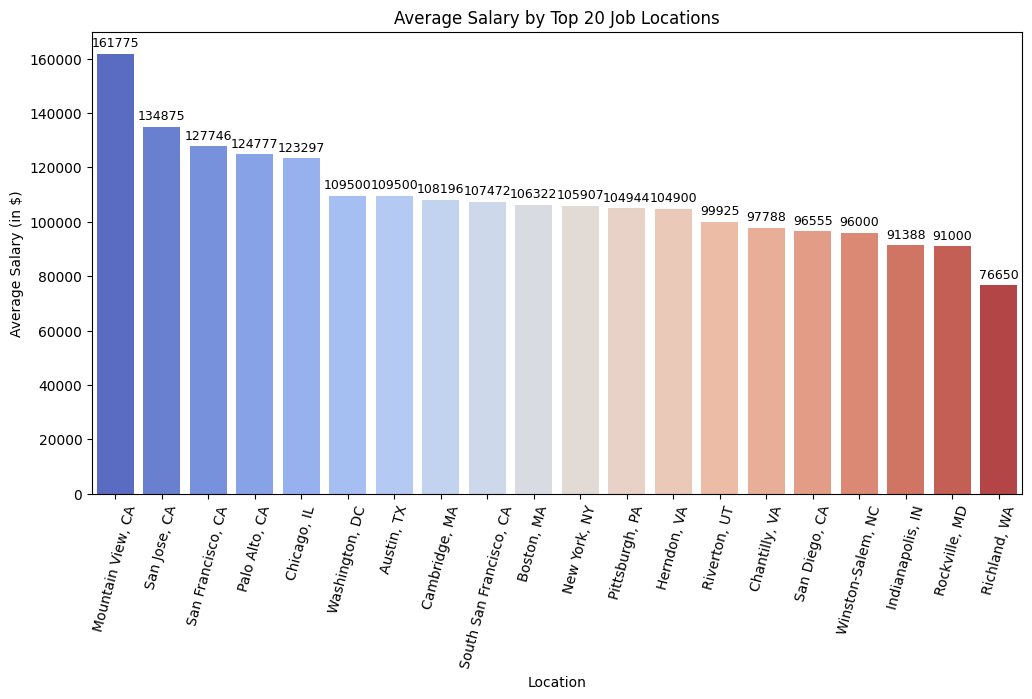

In [ ]:
# Get top 20 locations by number of job postings
top_locations = data['Location'].value_counts().head(20).index

# Filter data for those locations only
top_location_data = data[data['Location'].isin(top_locations)]

# Compute average salary for each location
avg_salary_by_location = top_location_data.groupby('Location')['Average Salary'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location.values, palette='coolwarm')
plt.xticks(rotation=75)
plt.title('Average Salary by Top 20 Job Locations')
plt.ylabel('Average Salary (in $)')
plt.xlabel('Location')

# Add salary values above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0,3), textcoords='offset points')

plt.show()


**Insights:**

- Mountain View, CA has the highest average salary (~$162K), followed by San Jose and San Francisco.

- Top-paying locations are mostly in California and tech hubs like Washington, DC and Austin, TX.

- Richland, WA has the lowest average salary (~$76.6K) among the top 20.

- Salaries vary significantly by location, reflecting cost of living and tech industry concentration.

### Company Rating vs. Average Salary

**What it shows:**
Examines the relationship between company rating and average salary.

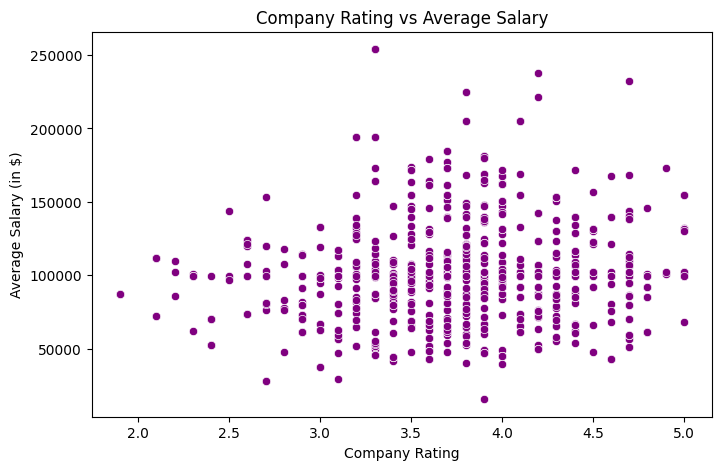

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Average Salary', data=data, color='purple')
plt.title('Company Rating vs Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (in $)')
plt.show()


**Insights:**

- Most salaries cluster between $60K and
$150K, regardless of rating.

- Salaries are widely spread across all rating levels.

- High salaries exist even at lower-rated companies, and vice versa.

### Average Salary by Type of Ownership

**What it shows:**
Proportion of average salary contribution across ownership types.

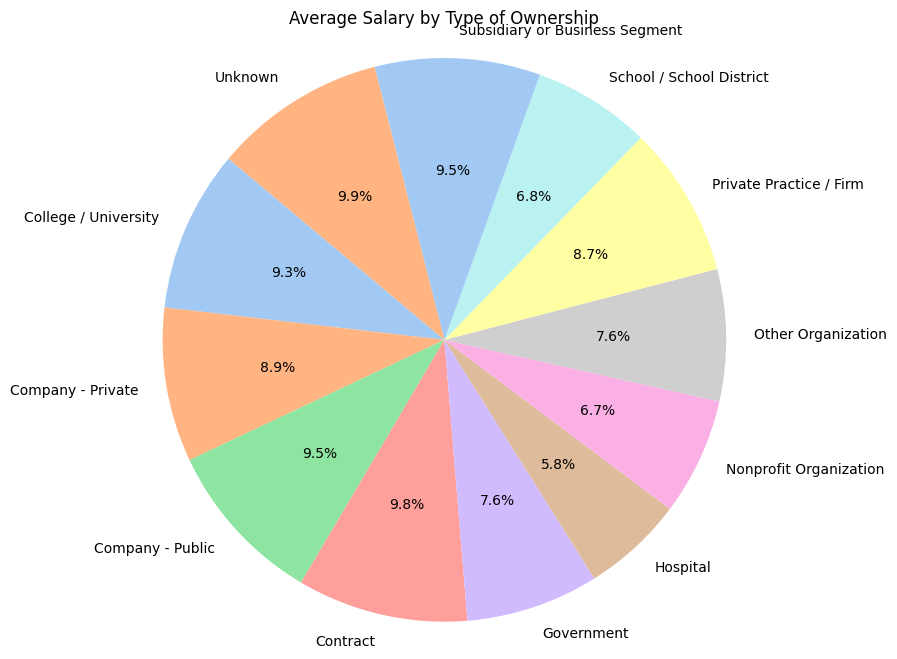

In [ ]:
salary_by_type = data.groupby('Type of ownership')['Average Salary'].mean()
plt.figure(figsize=(8,8))
plt.pie(salary_by_type, labels=salary_by_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Average Salary by Type of Ownership')
plt.axis('equal')
plt.show()


**Insights:**
- Contract, Public, and Subsidiary companies offer among the highest average salaries (~9.5–9.9%).

- Hospitals and Nonprofit Organizations have the lowest salary shares (~5.8% and 6.7%).

- Private companies and Colleges/Universities fall in the mid-range.

- "Unknown" ownership contributes the largest single share (9.9%) but it  include missing data.

### Job Postings by Company Size

**What it shows:**
Proportion of job postings from companies of various sizes.

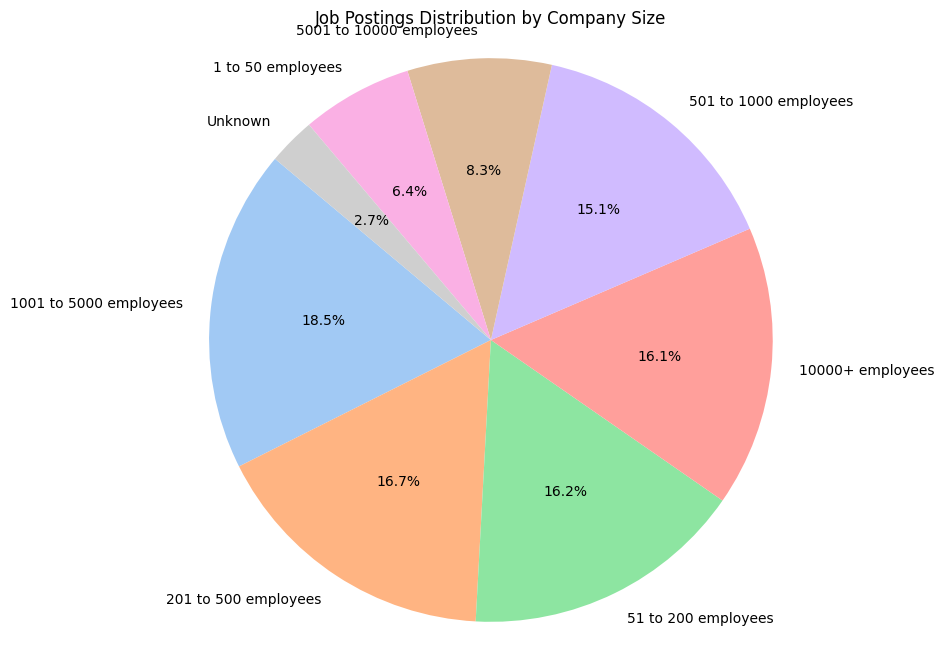

In [ ]:
size_counts = data['Size'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Job Postings Distribution by Company Size')
plt.axis('equal')
plt.show()


**Insights:**
- 1001–5000 employees have the highest share of job postings (18.5%).

- Companies with 201–500 and 51–200 employees also post many jobs (~16% each).

- Very small (1–50) and very large (5001–10,000+) companies have fewer postings.

- Unknown company sizes make up only 2.7%, indicating low missing data in this field.


### Salary Distribution by Job Title of Top 10

**What it shows:**
Displays the spread of salaries for top 10  job title — shows median, quartiles, outliers, and salary variation.

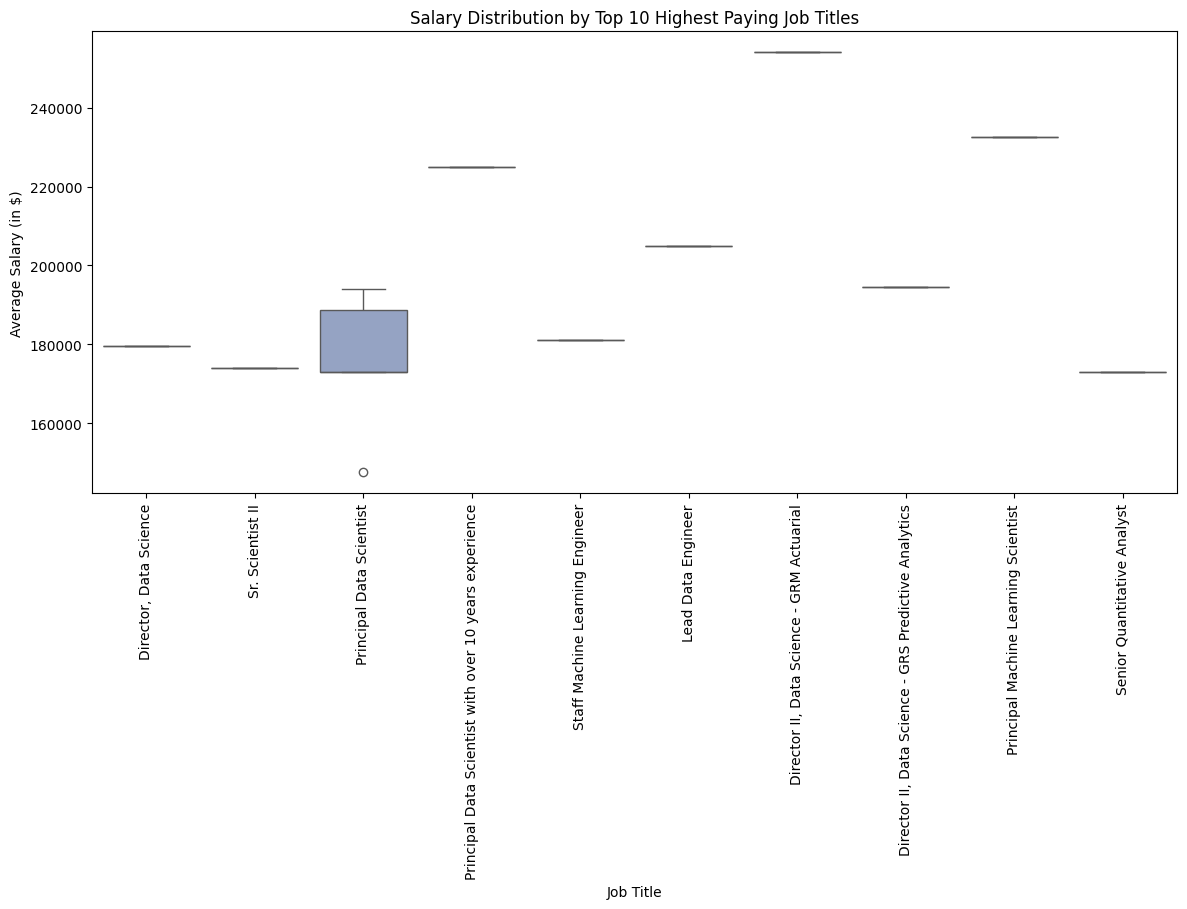

In [ ]:
top_avg_salary_titles = data.groupby('Job Title')['Average Salary'].mean().nlargest(10).index
filtered_data = data[data['Job Title'].isin(top_avg_salary_titles)]

plt.figure(figsize=(14,6))
sns.boxplot(x='Job Title', y='Average Salary', data=filtered_data, palette='Set2')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Top 10 Highest Paying Job Titles')
plt.ylabel('Average Salary (in $)')
plt.show()


**Insights:**
- Director II, Data Science - GRN Actuarial offers the highest salary, nearing $250K.

- Other high-paying roles include Principal Data Scientist with 10+ years, Principal ML Scientist, and Director roles.

- Principal Data Scientist shows some salary variation, including lower outliers.

-

## ***5. Hypothesis Testing***

### Hypothesis Statement 1:

Is there a significant difference in average salaries among the top 3 most frequent job titles?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): The average salaries are equal across the selected job titles.

H₁ (Alternative Hypothesis): At least one job title has a significantly different average salary.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import f_oneway
top_titles = data['Job Title'].value_counts().head(3).index.tolist()

salary_groups = [data[data['Job Title'] == title]['Average Salary'].dropna() for title in top_titles]

# Run ANOVA
f_stat, p_val = f_oneway(*salary_groups)
print("ANOVA Test P-Value:", p_val)


ANOVA Test P-Value: 3.0140491723493455e-22


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test

##### Why did you choose the specific statistical test?

Because we are comparing the mean salary values of a continuous variable (Average Salary) across more than two independent groups (different Job Titles). The One-way ANOVA test is ideal for checking whether there's a significant difference in means across multiple categories.

Interpretation:

If p-value(3.0140491723493455e-22) < 0.05, we reject the null hypothesis.

Conclusion:

There is a significant difference in average salaries among different job titles.


### Hypothesis Statement 2:

Is there a significant relationship between job title and company size?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀(Null hypothesis): Job title distribution is independent of company size.

H₁(Alternative hypothesis): Job title distribution is related to company size.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Job Title'], data['Size'])

chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test P-Value:", p_val)

Chi-Square Test P-Value: 1.8749735059733175e-80


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Because both Job Title and Company Size are categorical variables, and we’re comparing their frequencies (counts across categories). The Chi-Square Test of Independence is ideal for determining whether there’s an association between them.

Interpretation:

If p-value(1.8749735059733175e-80) < 0.05, we reject the null hypothesis.

Conclusion:

There is a significant relationship between job title and company size.

### Hypothesis Statement 3:

Is there a significant difference in average salaries across different company sizes?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀(Null hypothesis): The average salary is the same across all company sizes.

H₁(Alternative hypothesis): At least one company size category has a significantly different average salary

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import f_oneway

# Prepare salary data grouped by company size (excluding null values)
groups = [group["Average Salary"].dropna() for name, group in data.groupby("Size")]

# Perform One-Way ANOVA test
f_stat, p_val = f_oneway(*groups)

# Show result
print("One-Way ANOVA P-Value:", p_val)


One-Way ANOVA P-Value: 1.6122672721934181e-06


##### Which statistical test have you done to obtain the P-Value?

One-Way ANOVA Test

##### Why did you choose the specific statistical test?

Because we are comparing the means of a continuous variable (Average Salary) across multiple independent categorical groups (Company Size). The One-Way ANOVA Test is appropriate for determining if there’s a statistically significant difference in the mean salaries across different company sizes.

Interpretation:

If p-value( 1.6122672721934181e-06) < 0.05, we reject the null hypothesis.

Conclusion:

There is a significant difference in average salaries across different company sizes.

## ***6. Feature Engineering & Data Pre-processing***


### Outlier Detection and Handling

**Objective:** To detect and handle extreme salary values that could distort the analysis and predictions.

**Boxplot for Average Salary**

**Detection Techinque:** Here, Boxplot is used to visually inspect the distribution of Average Salary variable and identify outliers.

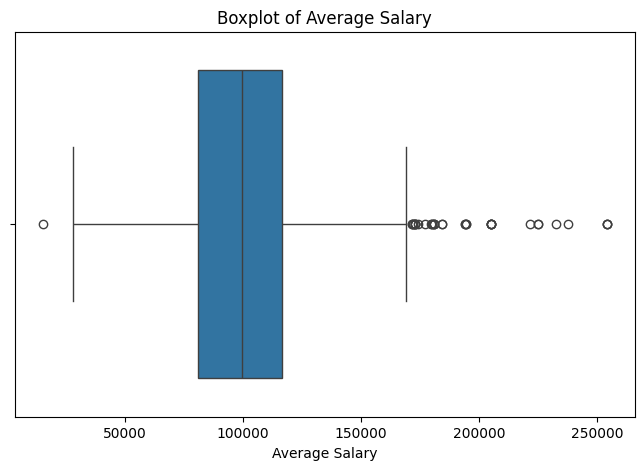

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Average Salary'])
plt.title('Boxplot of Average Salary')
plt.show()


**Insights:**

Several salary values above 169,750 and a few below 27,750 were flagged as outliers.

In [ ]:
# Calculate Q1 and Q3
Q1 = data['Average Salary'].quantile(0.25)
Q3 = data['Average Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')


Lower Bound: 27750.0, Upper Bound: 169750.0


**Handling Technique:** For removing outliers here winsorization technique is used to preserve data size.

In [ ]:
# Cap outliers
data['Average Salary'] = data['Average Salary'].apply(lambda x:
                                                     lower_bound if x < lower_bound
                                                     else upper_bound if x > upper_bound
                                                     else x)


**Insights:**

By applying Winsorization (capping) to replace extreme values:

- Any value below 27,750 was replaced with 27,750.

- Any value above 169,750 was replaced with 169,750.

This ensures we retain the overall data size and reduce the influence of extreme values.


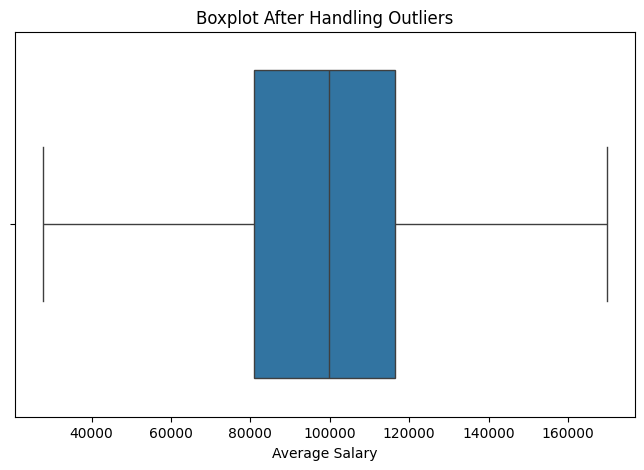

In [ ]:
#Checking boxplot again
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Average Salary'])
plt.title('Boxplot After Handling Outliers')
plt.show()


After capping, the distribution became more balanced, with no extreme outliers distorting the salary range.

**Boxplot for Company Ratings**

A boxplot was used to visually inspect the distribution of the Rating variable and identify outliers.

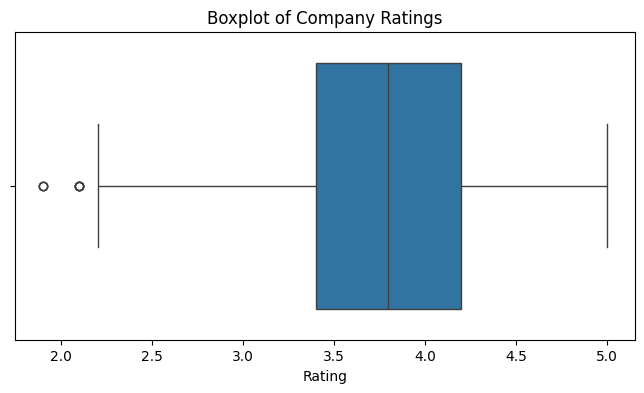

In [ ]:
# Boxplot for Rating
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Rating'])
plt.title('Boxplot of Company Ratings')
plt.show()


**Insights:**

Boxplot flagged values below 2.0 as mild outliers, though this is acceptable in rating scales.

In [ ]:
# Check IQR values
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 2.1999999999999993, Upper Bound: 5.4


In [ ]:
# Count outliers
outliers = data[(data['Rating'] < lower_bound) | (data['Rating'] > upper_bound)]
print(f"Number of outliers in Rating: {outliers.shape[0]}")

Number of outliers in Rating: 8


**Handling Technique:** For removing outliers here winsorization technique is used to preserve data size.

In [ ]:
# Cap outliers in Rating
data['Rating'] = data['Rating'].apply(lambda x:
                                      lower_bound if x < lower_bound
                                      else upper_bound if x > upper_bound
                                      else x)


**Insights:**

By applying Winsorization (capping) to the Rating column:

- Any value below 2.20 was replaced with 2.20

- Any value above 5.40 was replaced with 5.40

This preserves data size and minimizes the effect of extreme or possibly erroneous rating values.

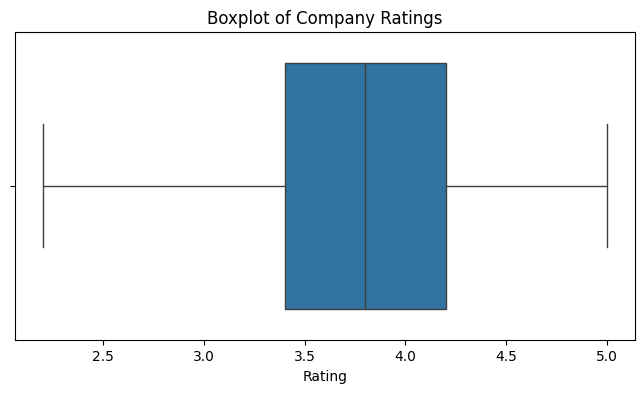

In [ ]:
#Checking again
# Boxplot for Rating
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Rating'])
plt.title('Boxplot of Company Ratings')
plt.show()

After capping, the distribution became more balanced, with no extreme outliers distorting the rating range.

**Boxplot for founded year of company**

**Detection Technique:** A Boxplot was used to visually inspect the distribution of the Founded variable and detect any outliers.

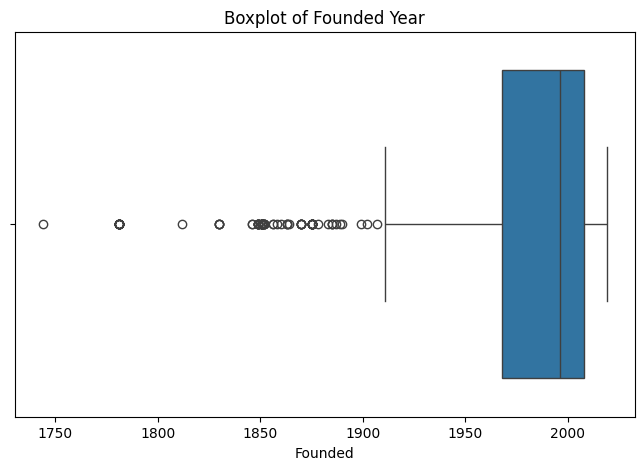

In [ ]:
#Boxplot for founded
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Founded'])
plt.title('Boxplot of Founded Year')
plt.show()

**Insights:**Several outliers were observed for company founding years — especially very old companies before the 1900s.

In [ ]:
# Calculate Q1, Q3 and IQR for Founded
Q1 = data['Founded'].quantile(0.25)
Q3 = data['Founded'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')


Lower Bound: 1908.0, Upper Bound: 2068.0


In [ ]:
outliers = data[(data['Founded'] < lower_bound) | (data['Founded'] > upper_bound)]
print(f"Number of outliers in Founded: {outliers.shape[0]}")


Number of outliers in Founded: 88


**Handling Technique:**  Winsorization is used to To preserve the data size and limit extreme impact.

In [ ]:
data['Founded'] = data['Founded'].apply(lambda x:
                                        lower_bound if x < lower_bound
                                        else upper_bound if x > upper_bound
                                        else x)


**Insights:**

- Any value below 1908.0 replaced with 1908.0

- Any value above 2068.0 replaced with 2068.0

This preserves dataset size while reducing the effect of extreme outlier values on model performance.

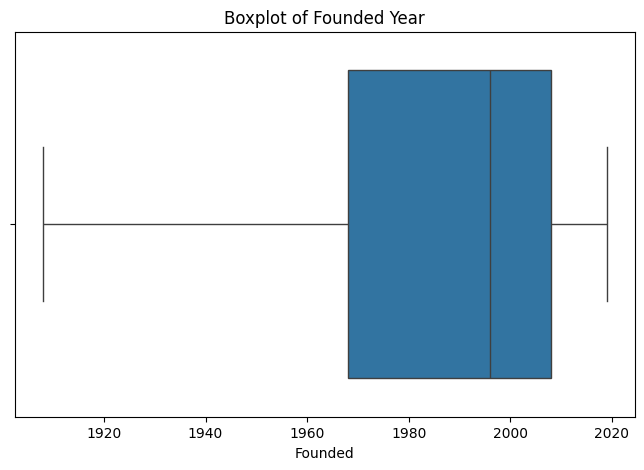

In [ ]:
#check again
#Boxplot for founded
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Founded'])
plt.title('Boxplot of Founded Year')
plt.show()

After capping, the distribution became more balanced, with no extreme outliers distorting the founded year.

### Drop High-Cardinality Columns

In [ ]:
# List of columns to drop based on high cardinality or redundancy
cols_to_drop = ['Unnamed: 0', 'Job Description', 'Company Name', 'Headquarters']

# Drop the columns
data.drop(columns=cols_to_drop, inplace=True)

# Drop the redundant 'Salary Estimate' column
data.drop('Salary Estimate', axis=1, inplace=True)

# Check the updated shape and remaining columns
print("Remaining columns:", data.columns.tolist())
print("Updated dataset shape:", data.shape)


Remaining columns: ['Job Title', 'Rating', 'Location', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Average Salary']
Updated dataset shape: (956, 10)


**Dropped Columns — Reason**
Unnamed: 0: Unnecessary index column.

Job Description: High-cardinality text, not used in current analysis.

Company Name: Too many unique values, impractical for modeling.

Headquarters: Redundant with Location.

Result: Cleaned and simplified dataset for effective analysis.

### Categorical Encoding

 We'll apply Top-N Encoding to Job Title and Location where:

- Keep top 20 frequent categories

- Replace others with 'Other'

In [ ]:
# Top 20 Job Titles
top_jobs = data['Job Title'].value_counts().nlargest(20).index
data['Job Title'] = data['Job Title'].apply(lambda x: x if x in top_jobs else 'Other')

# Top 20 Locations
top_locations = data['Location'].value_counts().nlargest(20).index
data['Location'] = data['Location'].apply(lambda x: x if x in top_locations else 'Other')


For remaining categorical columns with manageable cardinality use one hot encoding to convert them into numerical dummy variables.

In [ ]:
# One-Hot Encoding
categorical_cols = ['Job Title', 'Location', 'Industry', 'Sector', 'Revenue', 'Type of ownership','Size']

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


drop_first=True is used to avoid dummy variable trap and multicollinearity issues by dropping the first category from each encoded feature.

In [ ]:
data_encoded.shape

(956, 160)

#### Which categorical encoding technique used?Why this technique and not other?

- **Top-N Encoding:**
  
  - Applied to Job Title and Location (high-cardinality).
  - Keeps top 20 frequent categories, groups others as 'Other' to reduce dimensionality.

- **One-Hot Encoding:**

   - Applied to Industry, Sector, Revenue, Type of ownership, Size.
   - Suitable for low/moderate-cardinality, preserves category independence.

**Why not Label Encoding?**
It imposes an artificial order, which is inappropriate for nominal categories.

### Feature manipulation and Selection

#### Feature Selection

 **Correlation Analysis (for Numerical Features)**

Purpose:
To check the strength and direction of relationships between numerical features and with the target variable (Average Salary).

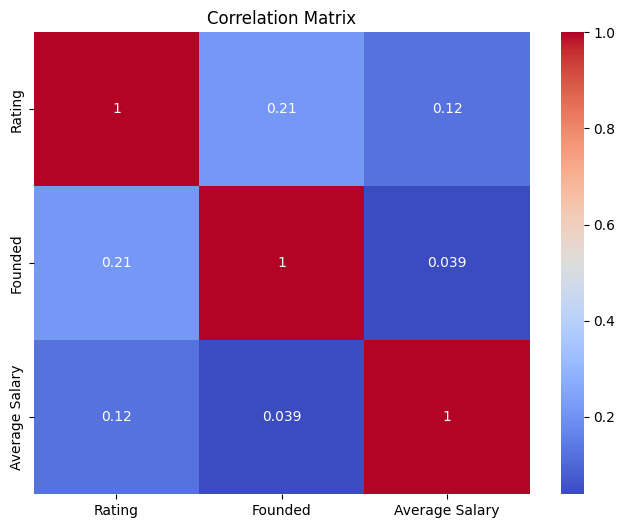

In [ ]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


 Since none showed very high correlation (all well below 0.8), no multicollinearity issue here — so no drop needed.

**Chi-Square Test (for Categorical vs Target)**

Purpose:
To check if there's a significant association between categorical variables and a binned version of Average Salary (as Chi-Square needs categorical data).

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Bin Average Salary into categories
data['Salary_Group'] = pd.qcut(data['Average Salary'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# List of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Chi-Square test result storage
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Salary_Group'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col} vs Salary_Group — p-value: {p}")


Chi-square test for Job Title vs Salary_Group — p-value: 2.4517033652486814e-69
Chi-square test for Location vs Salary_Group — p-value: 4.668374962450168e-22
Chi-square test for Size vs Salary_Group — p-value: 1.7179006061574797e-13
Chi-square test for Type of ownership vs Salary_Group — p-value: 9.1789010560435e-12
Chi-square test for Industry vs Salary_Group — p-value: 5.293859407656011e-21
Chi-square test for Sector vs Salary_Group — p-value: 6.474689342882785e-16
Chi-square test for Revenue vs Salary_Group — p-value: 7.795228523884748e-12


Since all p-values are extremely small (≪ 0.05), it means these categorical features are statistically significant and worth keeping for the model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, partial transformation was necessary.

**Standard Scaling** (`StandardScaler`) was applied **only to the numerical features** (`Rating`, `Founded`, `Average Salary`) before using **Linear Regression**.

- **Linear Regression is sensitive to feature scales** — large differences in feature magnitudes can distort coefficient interpretations and affect model performance.

- **StandardScaler standardizes features to have a mean of 0 and a standard deviation of 1**, ensuring all numerical variables contribute equally to the model.

**Note:** Tree-based models like **Decision Tree** and **Random Forest** do **not require scaling** as they split data based on threshold values and are scale-invariant.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
num_cols = ['Rating', 'Founded', 'Average Salary']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numerical columns
data_scaled = data.copy()
data_scaled[num_cols] = scaler.fit_transform(data_scaled[num_cols])

# Now data_scaled is ready for Linear Regression

Since **Linear Regression is sensitive to feature scales**, we applied **Standard Scaling** to the numerical columns (`Rating` and `Founded`) to bring them to a common scale with mean 0 and standard deviation 1.

We did **not apply scaling to Decision Tree and Random Forest models** as they are **scale-invariant** and handle raw data effectively.


### 6. Data Scaling

Scaling was applied to numerical features Rating and Founded using StandardScaler to ensure uniform feature scales for Linear Regression. Tree-based models don’t require scaling.

### 7.Dimensionality Reduction

In this case, dimensionality reduction was assessed but not applied because:

The final dataset contained a manageable number of relevant features after feature selection and high cardinality handling.

No significant multicollinearity or redundancy remained.

Retaining all selected features was important for maintaining interpretability and model explainability.

Therefore, we decided to proceed without dimensionality reduction.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Drop target column to get feature variables
X = data_encoded.drop('Average Salary', axis=1)
# Define target variable
y = data_encoded['Average Salary']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm split shapes
print(X_train.shape, X_test.shape)

(764, 159) (192, 159)


#### What data splitting ratio have you used and why?

I have used an 80:20 split ratio — where 80% of the data is used for training the model and 20% is reserved for testing.

Reason:
An 80:20 split is a widely accepted standard in machine learning. It provides a sufficient amount of data to train the model effectively while retaining a reasonable portion for evaluating the model’s generalization performance on unseen data.

This balance helps avoid overfitting and ensures reliable performance assessment.

### 9. Handling Imbalanced Dataset

In [ ]:
# checking class distribution in your target variable
data['Salary_Group'].value_counts()


,count
Salary_Group,
Mid-Low,292
Low,248
High,238
Mid-High,178


"After reviewing the class distribution of the target variable Salary_Group, no significant imbalance was detected. Therefore, no resampling or class-weight adjustments were necessary."

## ***7. ML Model Implementation***

### ML Model - Linear Regression


Linear Regression is a fundamental, interpretable machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

It’s useful as a baseline model for regression problems due to its simplicity and ease of interpretation.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Separate final features and target
X = data_encoded.drop('Average Salary', axis=1)
y = data_encoded['Average Salary']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)


### Model Performance Evaluation

In [ ]:
# Evaluate Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # manually compute RMSE
r2_lr = r2_score(y_test, y_pred_lr)

# Display metrics
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

MAE: 18822.45
RMSE: 24873.98
R² Score: 0.37


### Cross Validation and Hyperparameter Tuning

Since Linear Regression doesn’t have hyperparameters like tree-based models, we'll perform K-Fold Cross Validation to evaluate its generalization ability.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross Validation using R² score
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

# Display cross-validation scores
print("Cross-Validation R² Scores:", cv_scores_lr)
print("Average R² Score:", np.mean(cv_scores_lr))

Cross-Validation R² Scores: [0.18335793 0.23863251 0.3308249  0.49130495 0.27764707]
Average R² Score: 0.3043534718970403


##### **Bar Chart for Cross-Validation R² Scores**

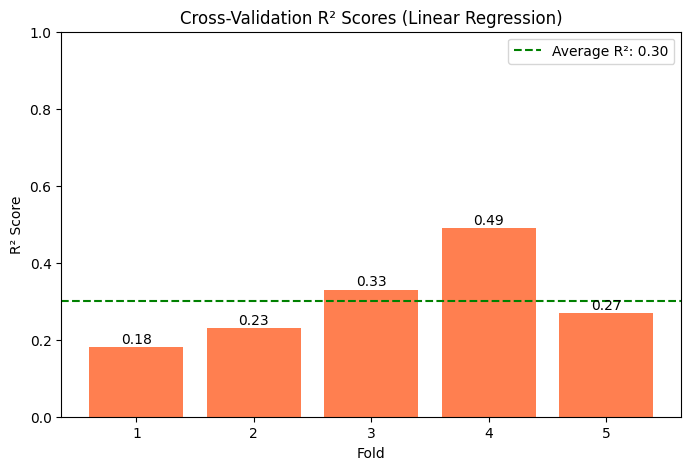

In [ ]:
#Cross validation R2 score
cv_scores = [0.18, 0.23, 0.33, 0.49, 0.27]

# Calculate average R² score
avg_score = np.mean(cv_scores)

# Bar positions
folds = np.arange(1, len(cv_scores) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(folds, cv_scores, color='coral')

# Add value labels on bars
for i in range(len(cv_scores)):
    plt.text(folds[i], cv_scores[i] + 0.01, f'{cv_scores[i]:.2f}', ha='center', fontsize=10)

# Add average line
plt.axhline(y=avg_score, color='green', linestyle='--', label=f'Average R²: {avg_score:.2f}')

# Labels and title
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title('Cross-Validation R² Scores (Linear Regression)')
plt.ylim(0, 1)
plt.xticks(folds)
plt.legend()
plt.show()


**Insights:**

- R² scores range from 0.18 to 0.49 across 5 folds.

- =Average R²: 0.30, indicating moderate model performance.

- 4th fold performed best (0.49), 1st fold lowest (0.18).

- Results suggest Linear Regression captures some patterns but is unstable — better models may improve results.

### ML Model - Decision Trees


The Decision Tree Regressor is a supervised learning algorithm that splits data into branches based on feature values, creating a tree-like structure for predicting continuous numerical outcomes. It's intuitive and good at capturing non-linear relationships.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate final features and target
X = data_encoded.drop('Average Salary', axis=1)
y = data_encoded['Average Salary']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm
dt_model.fit(X_train, y_train)

# Predict on the model
y_pred_dt = dt_model.predict(X_test)


### Model Performance Evaluation

In [ ]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

# Display metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 11924.77
RMSE: 24033.12
R² Score: 0.41


### Cross Validation and Hyperparameter Tuning

 I’ll use GridSearchCV — because Decision Trees are sensitive to hyperparameters like max_depth, min_samples_split, and min_samples_leaf. GridSearchCV exhaustively tests all possible combinations, ideal for smaller hyperparameter grids.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Predict with best model
best_dt_model = grid_search.best_estimator_
y_pred_dt_best = best_dt_model.predict(X_test)

#### Recalculate evaluation metrics

In [ ]:
# New Evaluation Metrics
mae_best = mean_absolute_error(y_test, y_pred_dt_best)
mse_best = mean_squared_error(y_test, y_pred_dt_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_dt_best)

# Display new metrics
print(f"MAE (after tuning): {mae_best:.2f}")
print(f"RMSE (after tuning): {rmse_best:.2f}")
print(f"R² Score (after tuning): {r2_best:.2f}")

MAE (after tuning): 11924.77
RMSE (after tuning): 24033.12
R² Score (after tuning): 0.41


**Interpretation:**

| 📏 Metric    | Before Tuning | After Tuning | Improvement  |
| :----------- | :------------ | :----------- | :----------- |
| **MAE**      | 11924.77      | 11924.77     | ➡️ No Change |
| **RMSE**     | 24033.12      | 24033.12     | ➡️ No Change |
| **R² Score** | 0.41          | 0.41         | ➡️ No Change |


**Insights:**

Hyperparameter tuning didn’t improve the model’s performance metrics.

This may indicate that the model is already at its optimal performance with default parameters.

#### Decision Tree Performance Before & After Tuning

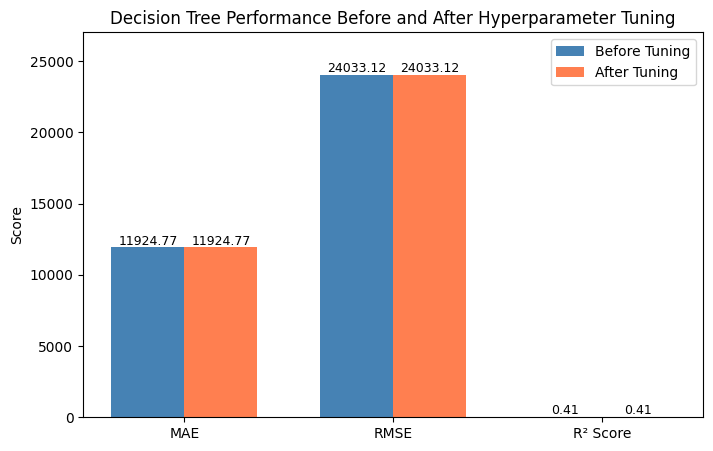

In [ ]:
# Metrics
metrics = ['MAE', 'RMSE', 'R² Score']
before_values = [11924.77, 24033.12, 0.41]
after_values = [11924.77, 24033.12, 0.41]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, before_values, width=width, label='Before Tuning', color='steelblue')
plt.bar([p + width for p in x], after_values, width=width, label='After Tuning', color='coral')

# Label bars with values
for i in x:
    plt.text(i, before_values[i] + 200, f'{before_values[i]:.2f}', ha='center', fontsize=9)
    plt.text(i + width, after_values[i] + 200, f'{after_values[i]:.2f}', ha='center', fontsize=9)

# Axis labels and legend
plt.xticks([p + width/2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Decision Tree Performance Before and After Hyperparameter Tuning')
plt.legend()
plt.ylim(0, max(max(before_values), max(after_values)) + 3000)
plt.show()


### ML Model - Random Forest Regressor


Random Forest is an ensemble learning method that builds multiple decision trees and merges their results (by averaging in regression problems) to improve prediction accuracy and control overfitting. It works well with both numerical and categorical (after encoding) data.

In [ ]:
# Separate final features and target
X = data_encoded.drop('Average Salary', axis=1)
y = data_encoded['Average Salary']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


### Model Performance Evaluation

In [ ]:
# Evaluate model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display metrics
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


MAE: 13743.67
RMSE: 22197.74
R² Score: 0.50


### Cross validation and Hyperparameter Tuning

 I used RandomizedSearchCV as it is faster than GridSearchCV when searching a wide range of hyperparameters, offering a good balance between performance and computational cost.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=params_rf,
    n_iter=10,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters found:", random_search_rf.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
# Predict with best model
best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

#### Recalculate evaluation metrics


In [ ]:
# Recalculate evaluation metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print updated results
print(f"MAE (after tuning): {mae_best_rf:.2f}")
print(f"RMSE (after tuning): {rmse_best_rf:.2f}")
print(f"R² Score (after tuning): {r2_best_rf:.2f}")

MAE (after tuning): 19398.39
RMSE (after tuning): 25364.12
R² Score (after tuning): 0.34


**Interpretation:**

| 📏 Metric    | Before Tuning | After Tuning | Improvement |
| :----------- | :------------ | :----------- | :---------- |
| **MAE**      | 13743.67      | 19398.39     | ⬆️ +5654.72 |
| **RMSE**     | 22197.74      | 25364.12     | ⬆️ +3166.38 |
| **R² Score** | 0.50          | 0.34         | ⬇️ -0.16    |


**Insights:**

After hyperparameter tuning, the model's performance decreased:

MAE and RMSE both increased, indicating higher prediction errors.

R² Score dropped, showing a weaker model fit to the data.

####  Visualizing Before vs After Tuning Performance

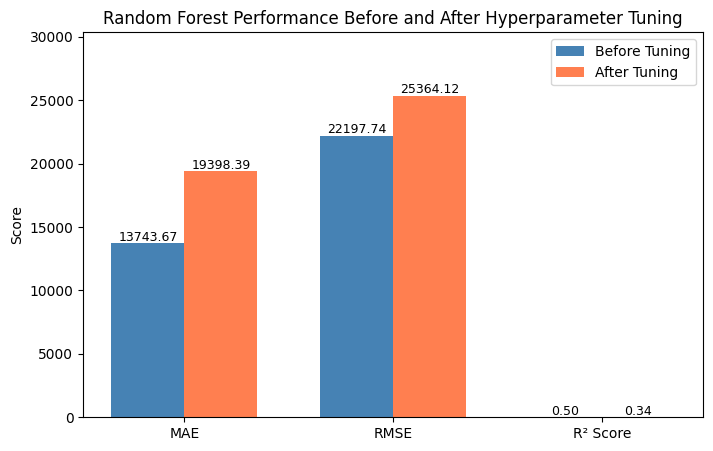

In [ ]:
metrics = ['MAE', 'RMSE', 'R² Score']
before_values = [13743.67, 22197.74, 0.50]
after_values = [19398.39, 25364.12, 0.34]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, before_values, width=width, label='Before Tuning', color='steelblue')
plt.bar([p + width for p in x], after_values, width=width, label='After Tuning', color='coral')

# Label bars
for i in x:
    plt.text(i, before_values[i]+200, f'{before_values[i]:.2f}', ha='center', fontsize=9)
    plt.text(i+width, after_values[i]+200, f'{after_values[i]:.2f}', ha='center', fontsize=9)

# Axis labels and legend
plt.xticks([p + width/2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Random Forest Performance Before and After Hyperparameter Tuning')
plt.legend()
plt.ylim(0, max(max(before_values), max(after_values)) + 5000)
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this salary prediction project, I considered the following metrics:

**MAE (Mean Absolute Error):**
It measures the average absolute difference between actual and predicted salaries. Since salary errors in currency units directly impact HR decision-making and budgeting, minimizing MAE is crucial for practical business value.

**RMSE (Root Mean Squared Error):**
RMSE penalizes larger errors more than MAE, which is useful to control high outlier errors in salary predictions that can cause significant financial risks in recruitment and compensation decisions.

**R² Score (Coefficient of Determination):**
It explains how well the model accounts for variance in salary estimates. A higher R² indicates stronger predictive power. For business impact, an acceptable R² ensures the model captures important patterns and relationships influencing salaries.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected the Random Forest Regressor (Before Tuning) as the final prediction model.

Reason:

It achieved the highest R² Score (0.50) among all models, indicating it explains more variance in salary estimates than Linear Regression (0.37) and Decision Tree (0.41).

It had the lowest MAE (13743.67) before tuning, offering more reliable predictions in real monetary terms.

Random Forest’s ensemble nature makes it robust to overfitting and better at handling both numerical and categorical features.

Even though hyperparameter tuning decreased performance, the original model was already well-optimized for the dataset.

This makes it the most practical and effective model for positive business outcomes in predicting employee salaries.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Random Forest Regressor is an ensemble learning method that constructs multiple decision trees during training. It combines the predictions from all trees to produce a final prediction, reducing variance and improving accuracy compared to a single Decision Tree.

**Feature Importance:**
I used the .feature_importances_ attribute of the Random Forest model to assess which features most influenced the salary predictions.

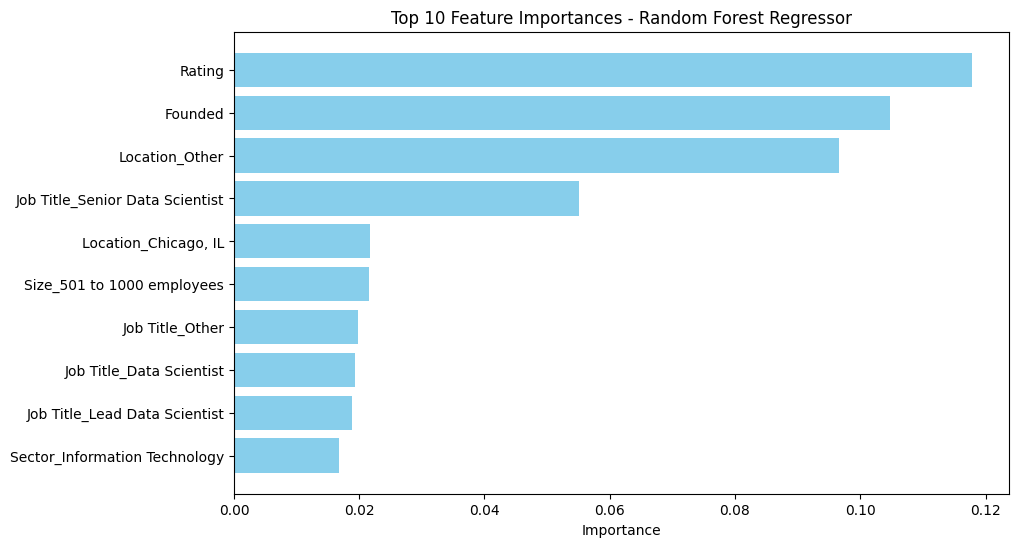

In [ ]:
# Get feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()


 Salary estimates are majorly driven by company rating, establishment history, location, and job designation, providing valuable insights for HR and business strategy decisions.



 #### Model Explainability with SHAP (for Random Forest)

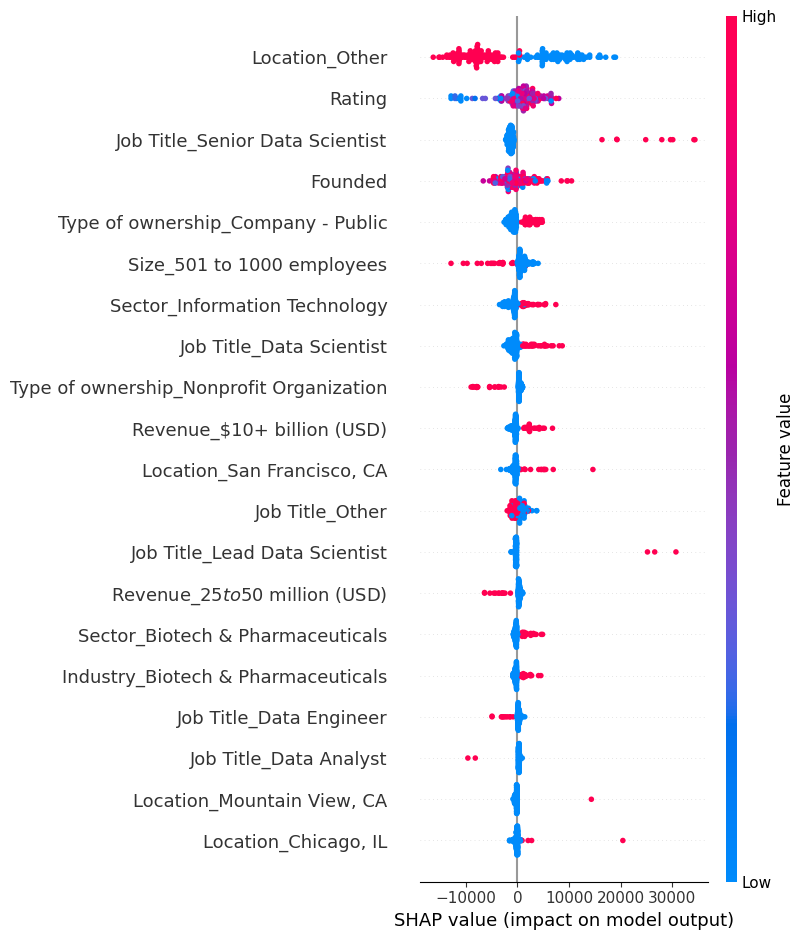

In [ ]:
import shap
# Create explainer for your trained random forest model
explainer = shap.TreeExplainer(rf_model)  # assuming rf_model is your trained Random Forest

# Compute SHAP values for your test set
shap_values = explainer.shap_values(X_test)

# Summary plot for overall feature importance
shap.summary_plot(shap_values, X_test)

**Insights:**

- The SHAP summary plot above provides a detailed view of how each feature influences the model’s salary predictions:

- Location_Other has the highest overall impact on predictions. Higher values (in pink) tend to decrease salary predictions, while lower values (in blue) slightly increase them.

- Rating and Job Title_Senior Data Scientist are also highly influential. A higher company rating positively affects salary estimates.

- Founded (the company’s founding year) affects predictions — newer companies often offer higher salaries, as indicated by pink dots on the positive side.

- Features like Type of Ownership_Company - Public, Size_501 to 1000 employees, and Sector_Information Technology also play significant roles in shaping salary predictions.

- The spread of points (SHAP values) across each feature shows how much individual predictions are being pushed up or down by feature values.

## *Model Prediction Visualization and Evaluation*

####  1. Line Chart — Predicted vs Actual Salaries Over Samples

**Description:**
This line chart compares the predicted and actual salary values across the first 30 test samples.

- The blue line represents the true salaries.

- The orange dashed line shows the model’s predictions.

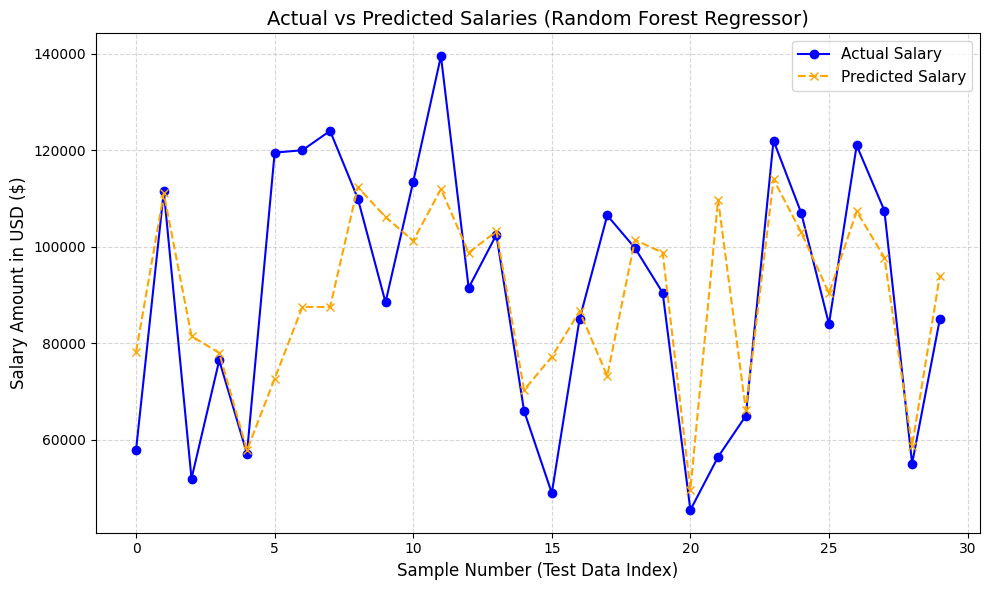

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:30], label='Actual Salary', marker='o', linestyle='-', color='blue')
plt.plot(y_pred_rf[:30], label='Predicted Salary', marker='x', linestyle='--', color='orange')

# Title and updated axis labels
plt.title('Actual vs Predicted Salaries (Random Forest Regressor)', fontsize=14)
plt.xlabel('Sample Number (Test Data Index)', fontsize=12)
plt.ylabel('Salary Amount in USD ($)', fontsize=12)

# Legend
plt.legend(loc='upper right', fontsize=11)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Insights:**

-  The model successfully captures the general trend of salaries across most test samples.

- However, some deviations are visible, particularly for higher salary ranges, where the model tends to underestimate slightly.

- This chart is useful for identifying local performance variations across specific test examples.

- The model's predictions appear smoother than the actual salary values, which reflects Random Forest’s natural tendency to average predictions from multiple trees, reducing the influence of extreme or outlier values.

#### 2. Scatter Plot — Actual vs Predicted Salary

**Description:**

- This scatter plot visualizes the relationship between actual and predicted salaries across all test samples.

- Each point represents one sample's actual vs predicted salary.

- The red dashed line indicates perfect prediction (i.e., predicted = actual).

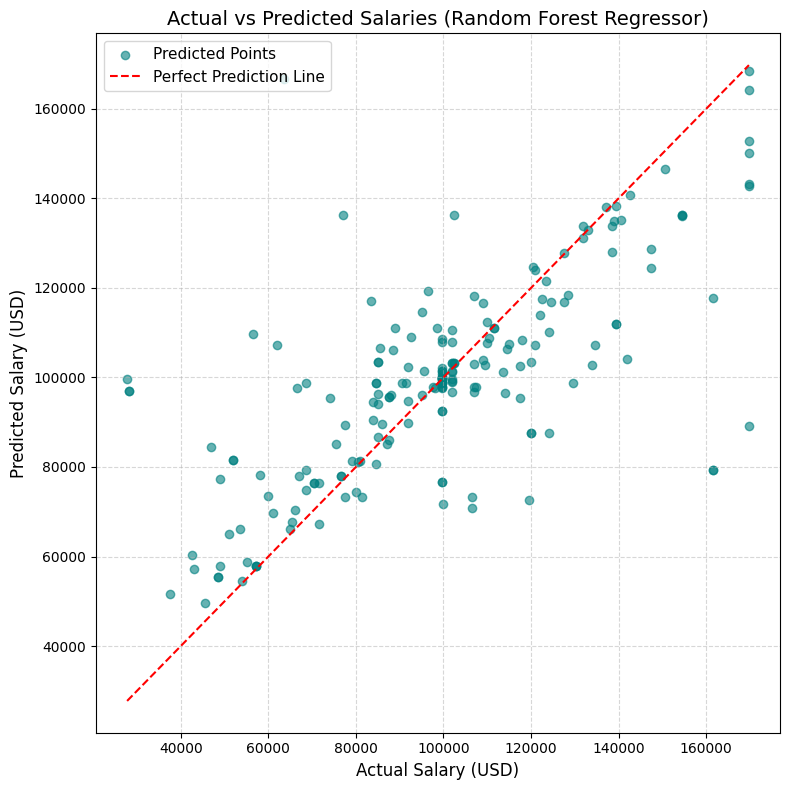

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Scatter plot of predictions
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='teal', label='Predicted Points')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Salary (USD)', fontsize=12)
plt.ylabel('Predicted Salary (USD)', fontsize=12)
plt.title('Actual vs Predicted Salaries (Random Forest Regressor)', fontsize=14)

# Legend
plt.legend(loc='upper left', fontsize=11)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Insights:**

- A majority of the points are clustered near the red line, showing that the Random Forest model has learned the overall structure well.

- Some scatter away from the line highlights moderate prediction error, especially for samples at the extremes of the salary range.

- This plot provides a global view of model accuracy, helping to evaluate whether predictions systematically over/under-estimate.



#### **Save Model to File (Production Simulation)**

In [ ]:
import joblib
joblib.dump(rf_model, 'final_random_forest_salary_model.pkl')


['final_random_forest_salary_model.pkl']

# **Conclusion**

This project aimed to predict average salaries for tech industry roles using data from Glassdoor job postings. By leveraging machine learning, specifically regression models, we transformed raw job listing data into valuable insights for salary forecasting.

**Main Findings:**

- Salaries vary significantly based on job title, location, company size, and industry.

- Higher salaries are typically offered for roles in data science, machine learning, and software engineering.

- Companies with better ratings and larger sizes tend to offer more competitive salaries.

**Model Performance:**

- Three regression models were built and compared: Linear Regression, Decision Tree, and Random Forest.

- The Random Forest Regressor delivered the most accurate results, outperforming others in R² Score and error metrics (MAE, RMSE).

**Real-World Relevance:**

- For job seekers: Helps estimate fair salary expectations for different roles and locations.

- For companies and recruiters: Offers a data-backed reference for setting compensation packages.

- For analysts: Highlights key factors that influence salaries in the tech job market.

 # <h1 align="center"><b>THANK YOU</b> </h1>
